In [525]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [526]:
%cd drive/My\ Drive/Flipr\ hackathon

[Errno 2] No such file or directory: 'drive/My Drive/Flipr hackathon'
/content/drive/My Drive/Flipr hackathon


In [527]:
%ls

'21st march.csv'  'data(norm).csv'                   Solution_Sheet.docx
'cat (1).gsheet'  'data(norm).gsheet'                Test_dataset.xlsx
 cat.csv           fin.csv                           Train_dataset.xlsx
 cat.gsheet        Hackathon_4.0_ML_Guidelines.pdf   Untitled.ipynb
'cat(norm).csv'    int.csv                           Variable_Description.xlsx
 data.csv          int.gsheet
 data.gsheet      'int(norm).csv'


In [0]:
import pandas as pd


In [0]:
data = pd.read_excel(io="/content/drive/My Drive/Flipr hackathon/Train_dataset.xlsx",header=0)

In [530]:
data.Occupation.unique()

array(['Farmer', 'Cleaner', 'Driver', 'Manufacturing', 'Clerk', 'Sales',
       nan, 'Business', 'Researcher', 'Legal'], dtype=object)

In [531]:
data.head(5)
for col in data.columns:
  print(col)

people_ID
Region
Gender
Designation
Name
Married
Children
Occupation
Mode_transport
cases/1M
Deaths/1M
comorbidity
Age
Coma score
Pulmonary score
cardiological pressure
Diuresis
Platelets
HBB
d-dimer
Heart rate
HDL cholesterol
Charlson Index
Blood Glucose
Insurance
salary
FT/month
Infect_Prob


## Categorization

In [0]:
data.Region = pd.Categorical(data.Region)
regd = dict( enumerate(data['Region'].cat.categories ) ) 
data['Region'] = data.Region.cat.codes
data.Gender = pd.Categorical(data.Gender)
gend = dict( enumerate(data['Gender'].cat.categories ) )
data['Gender'] = data.Gender.cat.codes
data.Married = pd.Categorical(data.Married)
mard = dict( enumerate(data['Married'].cat.categories ) )
data['Married'] = data.Married.cat.codes
data.Occupation = pd.Categorical(data.Occupation)
occd = dict( enumerate(data['Occupation'].cat.categories ) )
data['Occupation'] = data.Occupation.cat.codes 
data.Mode_transport = pd.Categorical(data.Mode_transport)
trand = dict( enumerate(data['Mode_transport'].cat.categories ) )
data['Mode_transport'] = data.Mode_transport.cat.codes
data.comorbidity = pd.Categorical(data.comorbidity)
comd = dict( enumerate(data['comorbidity'].cat.categories ) )
data['comorbidity'] = data.comorbidity.cat.codes
data["cardiological pressure"] = pd.Categorical(data["cardiological pressure"])
card = dict( enumerate(data['cardiological pressure'].cat.categories ) )
data['cardiological pressure'] = data["cardiological pressure"].cat.codes
data["Pulmonary score"] = pd.Categorical(data["Pulmonary score"])
puld = dict( enumerate(data['Pulmonary score'].cat.categories ) )
data['Pulmonary score'] = data["Pulmonary score"].cat.codes

In [0]:
gend = {value:key for key, value in gend.items()}
mard = {value:key for key, value in mard.items()}
occd = {value:key for key, value in occd.items()}
trand = {value:key for key, value in trand.items()}
comd = {value:key for key, value in comd.items()}
card = {value:key for key, value in card.items()}
puld = {value:key for key, value in puld.items()}

In [534]:
regd

{0: 'Bengaluru', 1: 'Bhubaneshwar', 2: 'Chandigarh', 3: 'Chennai', 4: 'Delhi'}

In [0]:
# pb = data['Pulmonary score']
data = data.drop(columns = ['Designation','Name'])


In [0]:
data = data.dropna()

In [537]:
data.head(-5)

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,1,0,1,1.0,4,1,2,0,2,68,8,3,1,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
2,3,1,0,0,1.0,1,1,2,0,3,19,13,2,0,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,1,0,1,1.0,3,0,2,0,0,33,9,1,2,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,1,0,0,2.0,6,0,2,0,1,23,7,3,1,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800
5,6,1,0,1,1.0,2,1,2,0,3,35,9,0,3,389.0,139.0,86.0,216.0,94.0,38.0,5,5,4600000.0,1900000,2.0,49.518345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10700,22682,0,1,1,1.0,2,2,8,2,2,36,4,0,3,379.0,50.0,134.0,343.0,78.0,54.0,24,6,1400000.0,1000000,0.0,52.927680
10701,22683,0,1,1,0.0,5,1,8,2,2,50,12,0,3,256.0,42.0,55.0,274.0,96.0,40.0,37,6,700000.0,300000,2.0,46.943607
10702,22684,0,1,1,1.0,6,0,8,2,0,67,8,0,3,417.0,90.0,92.0,234.0,76.0,44.0,31,7,300000.0,1800000,2.0,53.944690
10703,22685,0,1,1,2.0,5,1,8,2,0,28,13,2,0,389.0,121.0,93.0,205.0,67.0,67.0,6,7,3600000.0,2100000,1.0,60.658171


In [0]:
data.to_csv('data.csv')

## Normalising

In [0]:
from sklearn import preprocessing

In [0]:
data = data.drop(columns="people_ID")

In [0]:
data = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(x_scaled)

In [542]:
data.head(-5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.25,0.0,1.0,0.5,0.500,0.5,0.142857,0.0,0.75,1.000000,0.416667,1.000000,0.50,0.973529,0.958621,0.384211,0.220000,0.64,0.657143,0.675,1.00,0.702128,0.50,1.0,0.290382
1,0.25,0.0,0.0,0.5,0.125,0.5,0.142857,0.0,1.00,0.057692,0.833333,0.666667,0.25,0.900000,0.751724,0.615789,0.086667,0.54,0.228571,1.000,0.75,0.659574,0.30,0.5,0.642857
2,0.25,0.0,1.0,0.5,0.375,0.0,0.142857,0.0,0.25,0.326923,0.500000,0.333333,0.75,0.882353,0.572414,0.773684,0.500000,0.28,0.714286,0.675,1.00,0.085106,1.00,0.5,0.285176
3,0.25,0.0,0.0,1.0,0.750,0.0,0.142857,0.0,0.50,0.134615,0.333333,1.000000,0.50,0.823529,0.041379,0.700000,0.873333,0.42,0.828571,0.800,1.00,0.617021,0.40,0.5,0.857143
4,0.25,0.0,1.0,0.5,0.250,0.5,0.142857,0.0,1.00,0.365385,0.500000,0.000000,1.00,0.820588,0.855172,0.347368,0.106667,0.88,0.085714,0.125,0.50,0.914894,0.80,1.0,0.295991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.00,1.0,1.0,0.5,0.250,1.0,1.000000,1.0,0.75,0.384615,0.083333,0.000000,1.00,0.791176,0.241379,0.600000,0.953333,0.56,0.542857,0.600,0.75,0.234043,0.35,0.0,0.345877
7046,0.00,1.0,1.0,0.0,0.625,0.5,1.000000,1.0,0.75,0.653846,0.750000,0.000000,1.00,0.429412,0.186207,0.184211,0.493333,0.92,0.142857,0.925,0.75,0.085106,0.00,1.0,0.258317
7047,0.00,1.0,1.0,0.5,0.750,0.0,1.000000,1.0,0.25,0.980769,0.416667,0.000000,1.00,0.902941,0.517241,0.378947,0.226667,0.52,0.257143,0.775,1.00,0.000000,0.75,1.0,0.360758
7048,0.00,1.0,1.0,1.0,0.625,0.5,1.000000,1.0,0.25,0.230769,0.833333,0.666667,0.25,0.820588,0.731034,0.384211,0.033333,0.34,0.914286,0.150,1.00,0.702128,0.90,0.5,0.458991


In [0]:
data.to_csv("data(norm).csv")
# inte.to_csv("int(norm).csv")

## Feature Selection

In [0]:
X = pd.read_csv("data(norm).csv", index_col=0, header=0)
y = X["24"]
X = X.drop(columns = '24')


In [0]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.model_selection import KFold

In [546]:
estimator = SVR(kernel = "linear")
selector = RFECV(estimator, step=1,cv=KFold(n_splits=5), min_features_to_select = 15)
selector = selector.fit(X, y)
selector.support_

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
        True, False,  True, False,  True, False])

In [0]:
features = [f for f,s in zip(X.columns, selector.support_) if s]

In [548]:
X.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
dtype: object

In [0]:
d = X[features]
d.to_csv("fin.csv")

In [0]:
d.columns = ['Region', 'Gender', 'Married', 'Children', 'Occupation', 'cases/1M',
       'Deaths/1M', 'Age', 'Coma score', 'Diuresis', 'Platelets', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Blood Glucose', 'salary']

## Model Building

In [0]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [552]:
data_mat = xgb.DMatrix(data=d,label=y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [0]:
X_train, X_test, y_train, y_test = train_test_split(d, y, test_size=0.2, random_state=143)
X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=143)

In [554]:
for col in X_train.columns:
  print(col)

Region
Gender
Married
Children
Occupation
cases/1M
Deaths/1M
Age
Coma score
Diuresis
Platelets
d-dimer
Heart rate
HDL cholesterol
Blood Glucose
salary


In [555]:
reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.1, max_depth = 2, alpha = 3, n_estimators = 50,)
eval_set = [(X_test, y_test)]
reg.fit(X_train_fin,y_train_fin,eval_metric="rmse", eval_set=eval_set, verbose=True)
preds_test = reg.predict(X_test)
preds_val = reg.predict(X_val)

[0]	validation_0-rmse:0.216667
[1]	validation_0-rmse:0.204335
[2]	validation_0-rmse:0.193828
[3]	validation_0-rmse:0.184801
[4]	validation_0-rmse:0.177078
[5]	validation_0-rmse:0.170589
[6]	validation_0-rmse:0.165088
[7]	validation_0-rmse:0.160561
[8]	validation_0-rmse:0.156755
[9]	validation_0-rmse:0.153593
[10]	validation_0-rmse:0.150985
[11]	validation_0-rmse:0.148867
[12]	validation_0-rmse:0.14697
[13]	validation_0-rmse:0.145392
[14]	validation_0-rmse:0.144195
[15]	validation_0-rmse:0.143235
[16]	validation_0-rmse:0.142334
[17]	validation_0-rmse:0.141324
[18]	validation_0-rmse:0.140785
[19]	validation_0-rmse:0.140051
[20]	validation_0-rmse:0.13968
[21]	validation_0-rmse:0.139139
[22]	validation_0-rmse:0.138798
[23]	validation_0-rmse:0.138398
[24]	validation_0-rmse:0.138248
[25]	validation_0-rmse:0.138112
[26]	validation_0-rmse:0.138038
[27]	validation_0-rmse:0.137971


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[28]	validation_0-rmse:0.137732
[29]	validation_0-rmse:0.13771
[30]	validation_0-rmse:0.137734
[31]	validation_0-rmse:0.137559
[32]	validation_0-rmse:0.137578
[33]	validation_0-rmse:0.137525
[34]	validation_0-rmse:0.137451
[35]	validation_0-rmse:0.137426
[36]	validation_0-rmse:0.137373
[37]	validation_0-rmse:0.13734
[38]	validation_0-rmse:0.137405
[39]	validation_0-rmse:0.137391
[40]	validation_0-rmse:0.137386
[41]	validation_0-rmse:0.137385
[42]	validation_0-rmse:0.137352
[43]	validation_0-rmse:0.13742
[44]	validation_0-rmse:0.137359
[45]	validation_0-rmse:0.137352
[46]	validation_0-rmse:0.137332
[47]	validation_0-rmse:0.137335
[48]	validation_0-rmse:0.137318
[49]	validation_0-rmse:0.137303


In [556]:
rmse_val = np.sqrt(mean_squared_error(y_val, preds_val))
print("RMSE: %f" % (rmse_val))

RMSE: 0.133048


In [557]:
rmse_pred = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE: %f" % (rmse_pred))

RMSE: 0.137303


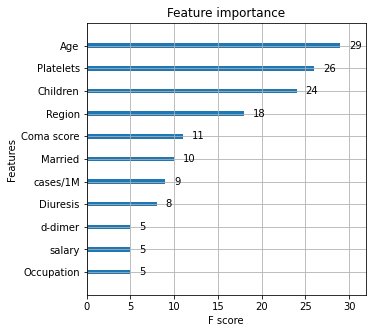

In [558]:
xgb.plot_importance(reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [559]:
params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.4,
                'max_depth': 3, 'alpha': 2, 'n-estimators': 10}

cv_results = xgb.cv(dtrain=data_mat, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=143)

[06:16:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:16:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:16:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [560]:
cv_results.head(-5)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.174243,0.000708,0.174799,0.001306
1,0.148418,0.001279,0.149859,0.001801
2,0.137388,0.001679,0.139494,0.001577
3,0.132171,0.002185,0.135120,0.001430
4,0.129705,0.001788,0.132947,0.001847
5,0.128423,0.001826,0.132125,0.002085
6,0.127585,0.001653,0.131536,0.002302
7,0.127155,0.001632,0.131516,0.002248
8,0.126843,0.001696,0.131513,0.002211


## Final preds

In [0]:
test = pd.read_excel(io="Test_dataset.xlsx", header=0)

In [562]:
test.head()
for col in test.columns:
  print(col)
# test.shape

people_ID
Region
Gender
Designation
Name
Married
Children
Occupation
Mode_transport
cases/1M
Deaths/1M
comorbidity
Age
Coma score
Pulmonary score
cardiological pressure
Diuresis
Platelets
HBB
d-dimer
Heart rate
HDL cholesterol
Charlson Index
Blood Glucose
Insurance
salary
FT/month


In [0]:
data = test[['people_ID','Designation','Name']]
test = test.drop(columns=['people_ID','Designation','Name'])

In [564]:
print(regd)
print(test['Region'].unique())
r = {5:'Hyderabad' , 6:'Pune', 7:'Thiruvananthapuram', 8:'Kolkata', 9:'Mumbai'}
regd.update(r)
regd = {value:key for key, value in regd.items()}
print(regd)

{0: 'Bengaluru', 1: 'Bhubaneshwar', 2: 'Chandigarh', 3: 'Chennai', 4: 'Delhi'}
['Hyderabad' 'Delhi' 'Pune' 'Thiruvananthapuram' 'Kolkata' 'Mumbai']
{'Bengaluru': 0, 'Bhubaneshwar': 1, 'Chandigarh': 2, 'Chennai': 3, 'Delhi': 4, 'Hyderabad': 5, 'Pune': 6, 'Thiruvananthapuram': 7, 'Kolkata': 8, 'Mumbai': 9}


In [0]:
test.Region = pd.Categorical(test.Region)
test.Region = test.Region.replace(regd)
# test['Region'] = test['Region'].replace(regd)#= test.Region.cat.codes 
test.Gender = pd.Categorical(test.Gender)
test['Gender'] = test['Gender'].replace(gend)
test.Married = pd.Categorical(test.Married)
test['Married'] = test['Married'].replace(mard)
test.Occupation = pd.Categorical(test.Occupation)
test['Occupation'] = test['Occupation'].replace(occd) 
test.Mode_transport = pd.Categorical(test.Mode_transport)
test['Mode_transport'] = test['Mode_transport'].replace(trand)
test.comorbidity = pd.Categorical(test.comorbidity)
test['comorbidity'] = test['comorbidity'].replace(comd)
test["cardiological pressure"] = pd.Categorical(test["cardiological pressure"])
test['cardiological pressure'] = test["cardiological pressure"].replace(card)
test["Pulmonary score"] = pd.Categorical(test["Pulmonary score"])
test['Pulmonary score'] = test["Pulmonary score"].replace(puld)

In [566]:
test

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5,1,1,1,0,2,4,1,0,43,12,3,1,121,43,59,350,98,40,18,7,1700000,500000,2
1,4,0,1,0,2,0,4,1,1,49,15,2,0,125,78,37,350,74,54,38,3,4600000,1800000,2
2,6,0,1,2,2,2,3,1,1,55,11,1,2,125,131,69,350,57,54,32,5,2500000,1800000,2
3,7,1,1,1,0,2,11,2,1,29,4,3,1,134,91,87,350,97,70,22,7,3400000,400000,1
4,6,0,1,1,7,2,3,1,2,68,3,1,2,139,46,21,350,100,41,0,4,3400000,1600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,8,1,1,1,0,1,0,0,1,49,15,1,2,427,74,21,200,99,40,4,4,4300000,500000,1
14494,4,0,1,1,1,0,4,1,0,64,14,2,0,431,84,29,200,78,41,26,4,3100000,300000,0
14495,9,1,1,1,7,0,13,3,2,37,4,2,0,440,154,97,200,77,54,8,6,1300000,1500000,2
14496,5,0,1,2,4,0,4,1,1,33,14,2,0,442,35,198,200,83,41,13,4,1300000,1100000,1


In [0]:
features = [f for f,s in zip(test.columns, selector.support_) if s]
test = test[features]


In [568]:
test.columns

Index(['Region', 'Gender', 'Married', 'Children', 'Occupation', 'cases/1M',
       'Deaths/1M', 'Age', 'Coma score', 'Diuresis', 'Platelets', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Blood Glucose', 'salary'],
      dtype='object')

In [0]:
test = test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(test)
test = pd.DataFrame(x_scaled)

In [570]:
test.shape
# for col in test.columns:
#   print(col)

(14498, 16)

In [0]:
test.columns = ['Region', 'Gender', 'Married', 'Children', 'Occupation', 'cases/1M',
       'Deaths/1M', 'Age', 'Coma score', 'Diuresis', 'Platelets', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Blood Glucose', 'salary']

In [0]:
mat = xgb.DMatrix(test.values)

In [0]:
fin_pred = reg.predict(test)

In [0]:
fin_pred = pd.DataFrame(fin_pred)
data = pd.DataFrame(data)

In [0]:
result = pd.concat([data, fin_pred],axis=1)

In [0]:
result = result.rename(columns={0:"21st March Probability"})

In [0]:
result = result.drop(columns=['Name',"Designation"])

In [0]:
result.to_csv("21st march(1).csv")